In [1]:
import numpy as np
import lpt as lpt
import CosmologyLibraryM as cosmolib
import matplotlib.pyplot as plt
import gc
import copy
import time

In [2]:
## All the parameters 
GridSize = 256
XSize = 128.

# Obtaining initial density field and the associated Power Spectrum

In [3]:
## Get a density field
inst1 = lpt.initial_density_field(GridSize=GridSize, XSize = XSize,Seed = None)
deltax =  inst1.initial_deltax()
kbyh,Pkbyh,ind = inst1.PS_initial()
del ind
gc.collect()

23

 # Calculating Power Spectrum of the initial density field (Sanity Check)

In [4]:
start = time.time()
Pk,k = inst1.PS_calc(XSize,deltax,NofBins=100,kmin=None,kmax=None)
j=0
print time.time()-start
del deltax,inst1
gc.collect()

2.14252686501


0


#### Multiple Realisations

In [5]:
Pkm = copy.deepcopy(Pk)

In [ ]:
j+=1
N=100
for i in range(0,N):
    inst1 = lpt.initial_density_field(GridSize = GridSize, XSize = XSize, Seed = None)
    deltax = inst1.initial_deltax()
    Pk_temp,k_temp = inst1.PS_calc(XSize,deltax,NofBins = 100, kmin=None, kmax=None)
    Pkm+=Pk_temp
    del inst1,deltax,Pk_temp,k_temp
    gc.collect()
Pkmult = Pkm/(1+j*N)
print (1+j*N)

In [ ]:
fig = plt.figure(figsize=(7,7), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.title('Single realisation PS')
plt.plot(kbyh,Pkbyh,label='PS_initial')
plt.plot(k,Pk,'.',markersize=1,label='PS_initial_calc')
plt.legend()

plt.subplot(2,2,2)
plt.title('Single realisation PS -log')
plt.loglog(kbyh,Pkbyh,label='PS_initial')
plt.loglog(k,Pk,'.',markersize=1,label='PS_initial_calc')
plt.legend()

plt.subplot(2,2,3)

plt.title(str(1+j*100)+' realisations PS_avg')
plt.plot(kbyh,Pkbyh,label='PS_initial')
plt.plot(k,Pkmult,'.',markersize=1,label='PS_initial_calc')
plt.legend()

plt.subplot(2,2,4)
plt.title(str(1+j*100)+' realisations PS_avg -log')
plt.loglog(kbyh,Pkbyh,label = 'PS_initial')
plt.loglog(k,Pkmult,'.',markersize=1,label='PS_initial_calc')
plt.legend()
plt.show()

In [26]:
del Pkmult,k,kbyh,Pkbyh,Pkm,Pk
gc.collect()

5320

## Comparing 2lpt,zeldovich,linear power spectrum at different redshifts

### Box Size 128 Mpc h^-1

In [27]:
inst2 = lpt.LPT(GridSize=GridSize, XSize = 128,Seed = None)
RedShift =0
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
fig=plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.title('Box = 128 Mpc h^-1')

plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')


plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(3,2,2)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])

RedShift =10
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,1)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(3,2,2)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])


RedShift =100
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,1)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(3,2,2)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])


0.0490873852123 0.0490873852123
0.0490873852123 0.0490873852123
0.0490873852123 0.0490873852123


(0.04908738521234051, 10.304948915997745)

### Box Size = 1024 h Mpc^-1

In [28]:
inst2 = lpt.LPT(GridSize=GridSize, XSize = 1024,Seed = None)
RedShift =0
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,3)
plt.title('Box = 1024 Mpc h^-1')

plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')


plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(3,2,4)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])

RedShift =10
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,3)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(3,2,4)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])


RedShift =100
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,3)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(3,2,4)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])


0.00613592315154 0.00613592315154
0.00613592315154 0.00613592315154
0.00613592315154 0.00613592315154


(0.0061359231515425612, 1.2881186144997177)

### BoxSize = 4096 Mpc h ^-1

0.00153398078789 0.00153398078789
0.00153398078789 0.00153398078789
0.00153398078789 0.00153398078789


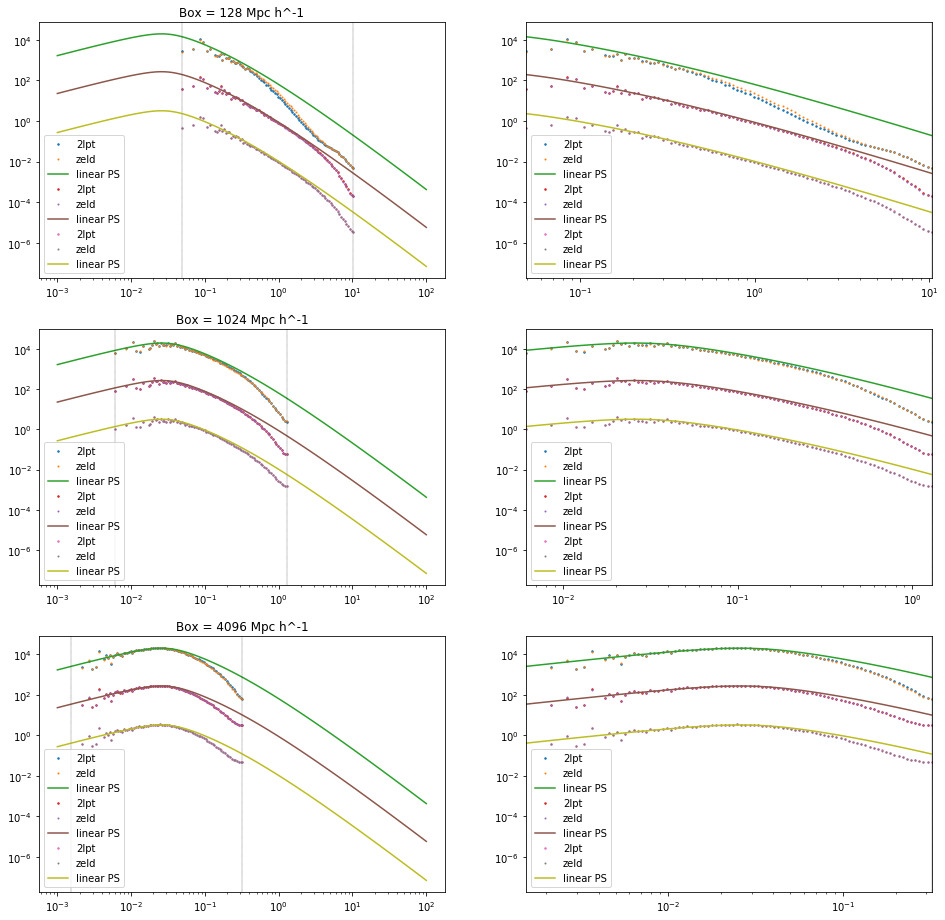

In [29]:
inst2 = lpt.LPT(GridSize=GridSize, XSize = 4096,Seed = None)
RedShift =0
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,5)
plt.title('Box = 4096 Mpc h^-1')

plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')


plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(3,2,6)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])

RedShift =10
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,5)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(3,2,6)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])


RedShift =100
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,5)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(3,2,6)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])
plt.show()

## Box 40 Mpc h^-1

0.157079632679 0.157079632679
0.157079632679 0.157079632679
0.157079632679 0.157079632679


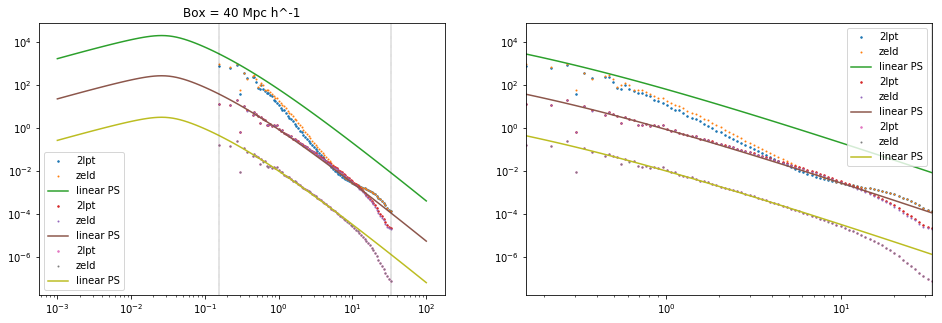

In [30]:
fig=plt.figure(figsize=(16,5))
inst2 = lpt.LPT(GridSize=GridSize, XSize = 40,Seed = None)
RedShift =0
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(1,2,1)
plt.title('Box = 40 Mpc h^-1')

plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')


plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(1,2,2)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])

RedShift =10
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(1,2,1)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(1,2,2)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])


RedShift =100
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(1,2,1)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(1,2,2)
plt.loglog(k_2lpt,Pk_2lpt,'.',markersize=3,label='2lpt')
plt.loglog(k_zeld,Pk_zeld,'.',markersize=2,label='zeld')
plt.loglog(k,Pk_linear,label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])
plt.show()